
# Factors Affecting Children Anemia Level
## מגישות: טל אגאי וגילי צור 
#### <span style="color:blue">project:</span>




# רקע על הדאטה:

המידע לקוח מאתר kuggle:
https://www.kaggle.com/datasets/adeolaadesina/factors-affecting-children-anemia-level

##### ייבוא ספריות רלוונטיות

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

In [7]:
url='https://raw.githubusercontent.com/giliandtal/project/main/children%20anemia%20part1.csv'
url2='https://raw.githubusercontent.com/giliandtal/project/main/children%20anemia%20part2.csv'
url3='https://raw.githubusercontent.com/giliandtal/project/main/children%20anemia%20part3.csv'
url4='https://raw.githubusercontent.com/giliandtal/project/main/children%20anemia%20part4.csv'
anemia1_df=pd.read_csv(url)
anemia2_df=pd.read_csv(url2)
anemia3_df=pd.read_csv(url3)
anemia4_df=pd.read_csv(url4)
anemia_df=pd.concat([anemia1_df,anemia2_df,anemia3_df,anemia4_df]).reset_index()
anemia_df

,index,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
0,0,20-24,Urban,Secondary,Richest,1,21,NaN,NaN,Yes,No,No longer living together/separated,NaN,Immediately,No,NaN,NaN,No
1,1,20-24,Urban,Secondary,Richest,1,19,108.0,Moderate,Yes,No,Married,Living with her,Immediately,No,113.0,Not anemic,Yes
2,2,20-24,Urban,Higher,Richest,2,19,118.0,Mild,Yes,No,Married,Living with her,Immediately,No,96.0,Moderate,Yes
3,3,20-24,Urban,Higher,Richest,2,19,118.0,Mild,Yes,No,Married,Living with her,NaN,No,111.0,Not anemic,No
4,4,20-24,Urban,Secondary,Richest,2,19,NaN,NaN,Yes,No,Married,Living with her,Immediately,No,NaN,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33919,8742,35-39,Rural,No education,Poorest,1,17,NaN,NaN,No,No,Married,Staying elsewhere,Immediately,No,NaN,NaN,No
33920,8743,40-44,Rural,No education,Poorer,1,23,134.0,Not anemic,No,No,Married,Living with her,Immediately,No,104.0,Mild,No
33921,8744,35-39,Rural,Secondary,Richer,2,19,120.0,Not anemic,Yes,No,Married,Living with her,Immediately,No,108.0,Mild,Yes
33922,8745,35-39,Rural,Secondary,Richer,2,19,120.0,Not anemic,Yes,No,Married,Living with her,NaN,No,120.0,Not anemic,Yes


In [8]:
anemia_df.shape

(33924, 18)

In [9]:
anemia_df.columns

Index(['index', 'Age in 5-year groups', 'Type of place of residence',
       'Highest educational level', 'Wealth index combined',
       'Births in last five years', 'Age of respondent at 1st birth',
       'Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)',
       'Anemia level',
       'Have mosquito bed net for sleeping (from household questionnaire)',
       'Smokes cigarettes', 'Current marital status',
       'Currently residing with husband/partner', 'When child put to breast',
       'Had fever in last two weeks',
       'Hemoglobin level adjusted for altitude (g/dl - 1 decimal)',
       'Anemia level.1', 'Taking iron pills, sprinkles or syrup'],
      dtype='object')

In [10]:
anemia_df.isnull().sum()

index                                                                        0
Age in 5-year groups                                                         0
Type of place of residence                                                   0
Highest educational level                                                    0
Wealth index combined                                                        0
Births in last five years                                                    0
Age of respondent at 1st birth                                               0
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    20788
Anemia level                                                             20788
Have mosquito bed net for sleeping (from household questionnaire)            0
Smokes cigarettes                                                            0
Current marital status                                                       0
Currently residing with husband/partner             

In [12]:
anemia_df['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'].fillna(0, inplace=True)
anemia_df['Anemia level'].fillna('UNREPORTED', inplace=True)
anemia_df['Currently residing with husband/partner'].fillna('UNREPORTED', inplace=True)
anemia_df['When child put to breast'].fillna('UNREPORTED', inplace=True)
anemia_df['Had fever in last two weeks'].fillna('UNREPORTED', inplace=True)
anemia_df['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)'].fillna(0, inplace=True)
anemia_df['Anemia level.1'].fillna('UNREPORTED', inplace=True)
anemia_df['Taking iron pills, sprinkles or syrup'].fillna('UNREPORTED', inplace=True)

anemia_df.dtypes

index                                                                      int64
Age in 5-year groups                                                      object
Type of place of residence                                                object
Highest educational level                                                 object
Wealth index combined                                                     object
Births in last five years                                                  int64
Age of respondent at 1st birth                                             int64
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    float64
Anemia level                                                              object
Have mosquito bed net for sleeping (from household questionnaire)         object
Smokes cigarettes                                                         object
Current marital status                                                    object
Currently residing with husb

In [31]:
numeric_features = ['Births in last five years','Age of respondent at 1st birth','Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)','Hemoglobin level adjusted for altitude (g/dl - 1 decimal)','Anemia level']
target_features = ['Smokes cigarettes','Highest educational level','Type of place of residence','Anemia level.1','Had fever in last two weeks']
all_features = target_features + numeric_features 
all_features

['Smokes cigarettes',
 'Highest educational level',
 'Type of place of residence',
 'Anemia level.1',
 'Had fever in last two weeks',
 'Births in last five years',
 'Age of respondent at 1st birth',
 'Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)',
 'Hemoglobin level adjusted for altitude (g/dl - 1 decimal)',
 'Anemia level']

In [32]:
anemia_df_dum = pd.get_dummies(anemia_df[all_features])
anemia_df_dum.columns

Index(['Births in last five years', 'Age of respondent at 1st birth',
       'Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)',
       'Hemoglobin level adjusted for altitude (g/dl - 1 decimal)',
       'Smokes cigarettes_No', 'Smokes cigarettes_Yes',
       'Highest educational level_Higher',
       'Highest educational level_No education',
       'Highest educational level_Primary',
       'Highest educational level_Secondary',
       'Type of place of residence_Rural', 'Type of place of residence_Urban',
       'Anemia level.1_Mild', 'Anemia level.1_Moderate',
       'Anemia level.1_Not anemic', 'Anemia level.1_Severe',
       'Anemia level.1_UNREPORTED', 'Had fever in last two weeks_Don't know',
       'Had fever in last two weeks_No',
       'Had fever in last two weeks_UNREPORTED',
       'Had fever in last two weeks_Yes', 'Anemia level_Mild',
       'Anemia level_Moderate', 'Anemia level_Not anemic',
       'Anemia level_Severe', 'Anemia level_UNREPORTED'],

In [33]:
correlation_matrix = anemia_df_dum.corr(numeric_only = False, method = 'spearman' ).round(2)
correlation_matrix

,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Smokes cigarettes_No,Smokes cigarettes_Yes,Highest educational level_Higher,Highest educational level_No education,Highest educational level_Primary,Highest educational level_Secondary,...,Anemia level.1_UNREPORTED,Had fever in last two weeks_Don't know,Had fever in last two weeks_No,Had fever in last two weeks_UNREPORTED,Had fever in last two weeks_Yes,Anemia level_Mild,Anemia level_Moderate,Anemia level_Not anemic,Anemia level_Severe,Anemia level_UNREPORTED
Births in last five years,1.00,-0.06,0.01,-0.04,0.00,-0.00,-0.04,0.07,-0.01,-0.05,...,0.04,-0.01,-0.04,0.13,-0.04,0.02,-0.00,-0.01,0.02,-0.01
Age of respondent at 1st birth,-0.06,1.00,0.07,0.08,-0.00,0.00,0.32,-0.37,-0.05,0.25,...,-0.06,-0.01,0.11,-0.06,-0.08,0.02,0.00,0.06,-0.01,-0.06
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),0.01,0.07,1.00,0.77,-0.00,0.00,0.04,-0.10,0.03,0.07,...,-0.78,0.00,-0.00,-0.01,0.01,0.39,0.26,0.71,0.04,-0.96
Hemoglobin level adjusted for altitude (g/dl - 1 decimal),-0.04,0.08,0.77,1.00,-0.00,0.00,0.05,-0.11,0.02,0.07,...,-0.98,-0.04,0.08,-0.21,0.06,0.33,0.33,0.47,0.05,-0.79
Smokes cigarettes_No,0.00,-0.00,-0.00,-0.00,1.00,-1.00,0.01,0.01,0.00,-0.02,...,0.00,-0.03,-0.00,0.00,0.01,0.00,0.00,-0.00,-0.00,0.00
Smokes cigarettes_Yes,-0.00,0.00,0.00,0.00,-1.00,1.00,-0.01,-0.01,-0.00,0.02,...,-0.00,0.03,0.00,-0.00,-0.01,-0.00,-0.00,0.00,0.00,-0.00
Highest educational level_Higher,-0.04,0.32,0.04,0.05,0.01,-0.01,1.00,-0.26,-0.12,-0.20,...,-0.03,-0.01,0.08,-0.04,-0.06,0.01,-0.02,0.05,-0.01,-0.03
Highest educational level_No education,0.07,-0.37,-0.10,-0.11,0.01,-0.01,-0.26,1.00,-0.39,-0.62,...,0.09,-0.01,-0.12,0.08,0.08,-0.03,-0.01,-0.09,0.01,0.09
Highest educational level_Primary,-0.01,-0.05,0.03,0.02,0.00,-0.00,-0.12,-0.39,1.00,-0.29,...,-0.03,0.01,-0.01,-0.00,0.01,0.01,0.01,0.02,0.01,-0.03
Highest educational level_Secondary,-0.05,0.25,0.07,0.07,-0.02,0.02,-0.20,-0.62,-0.29,1.00,...,-0.06,0.01,0.09,-0.06,-0.05,0.02,0.02,0.05,-0.01,-0.06


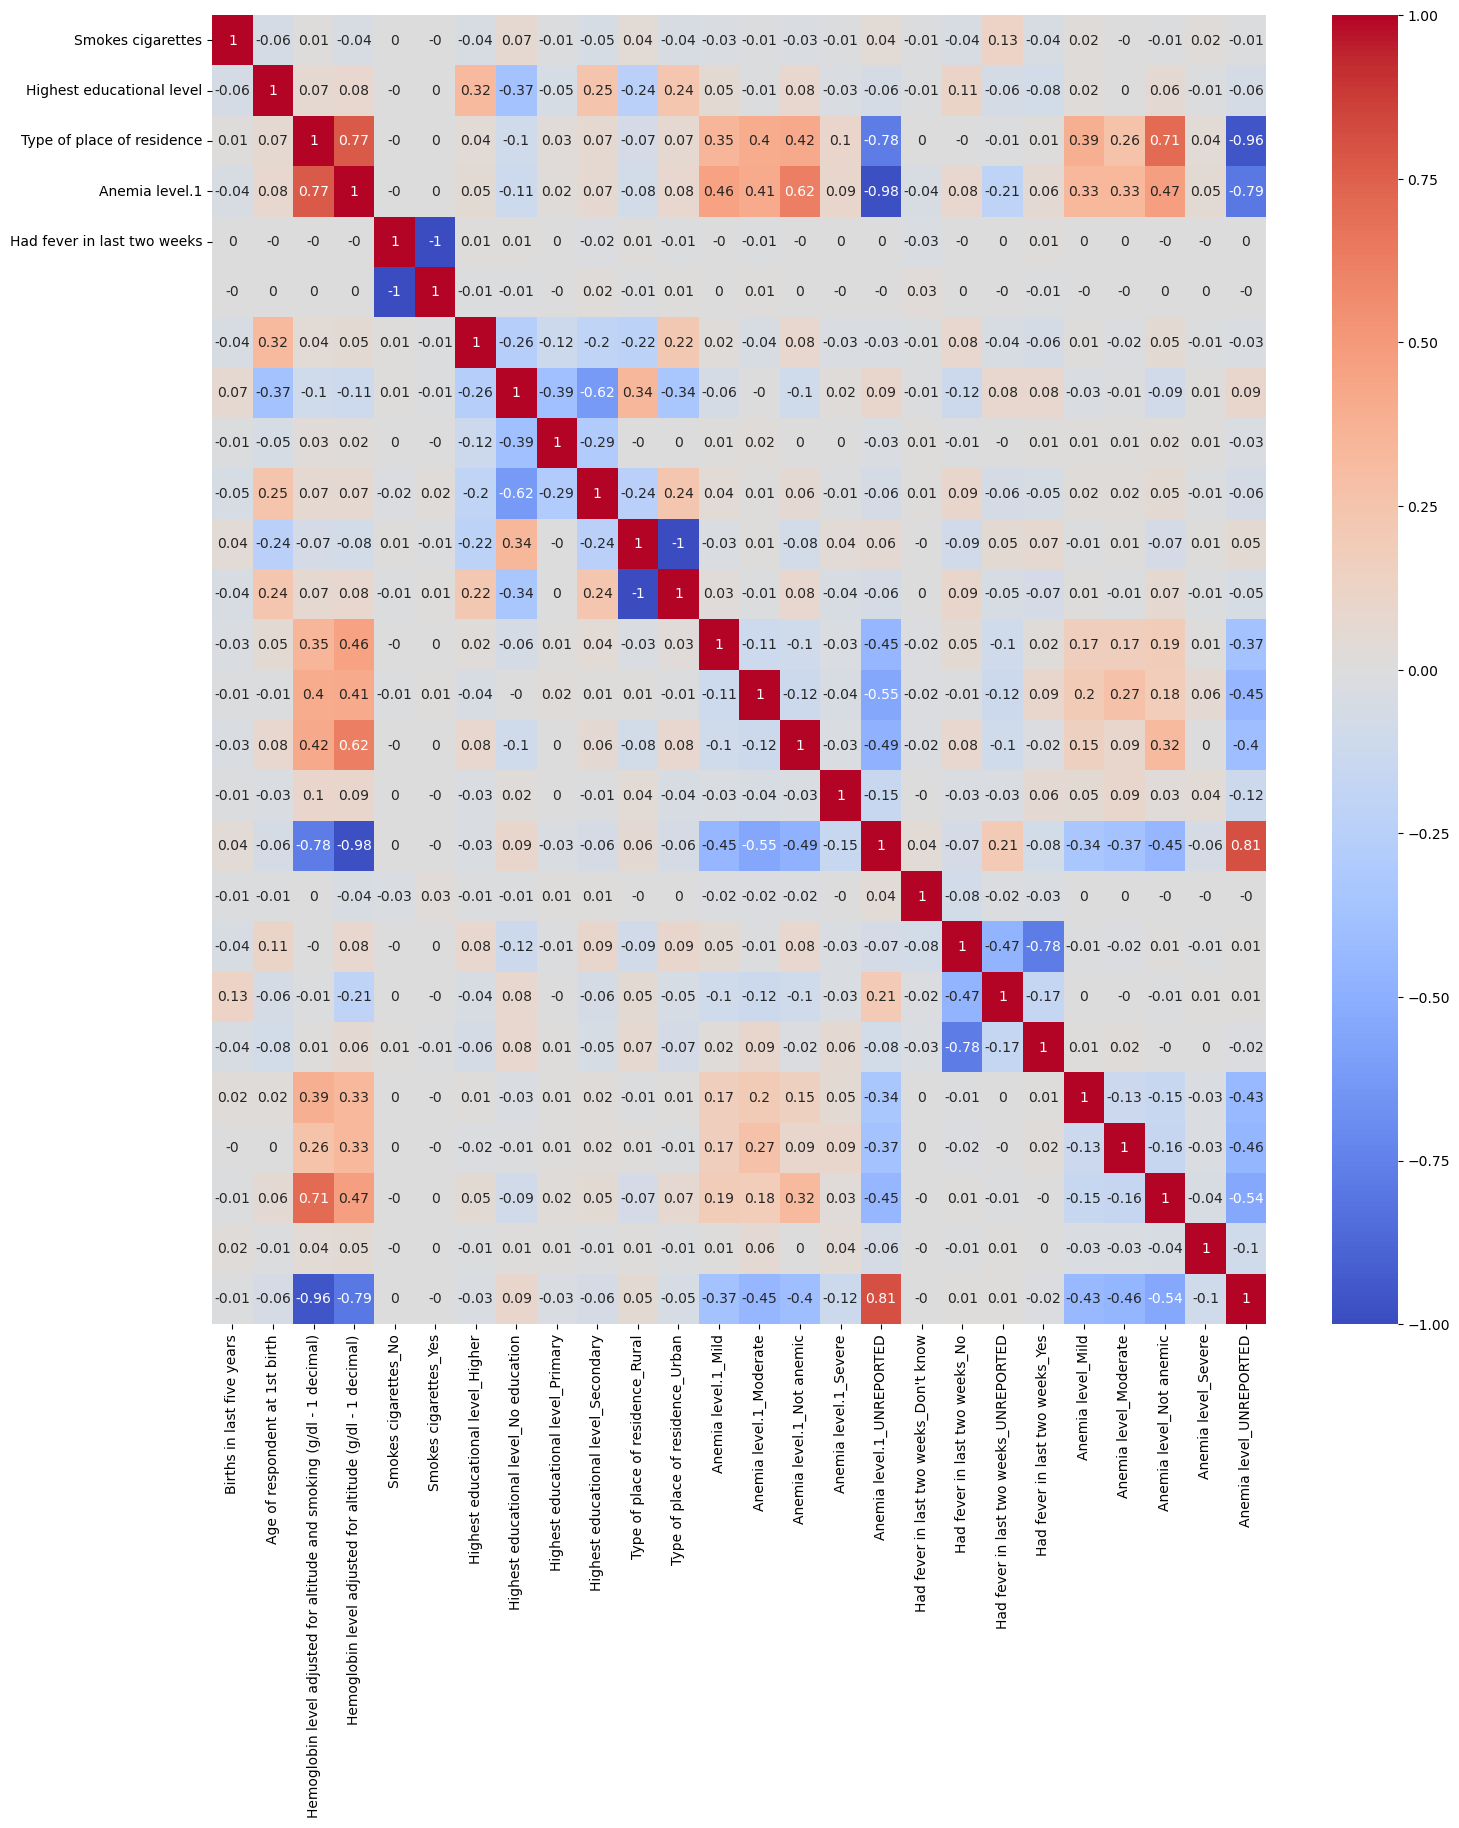

In [34]:
plt.figure(figsize=(17,17))
sns.heatmap(data=correlation_matrix,cmap='coolwarm', annot=True, xticklabels=anemia_df_dum.columns.tolist(), yticklabels=target_features)
plt.show()

<Axes: >

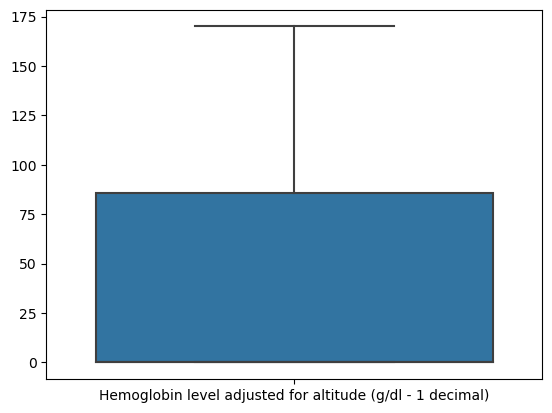

In [53]:

sns.boxplot(data = anemia_df[['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)',]])


<Axes: xlabel='Age in 5-year groups', ylabel='Percent'>

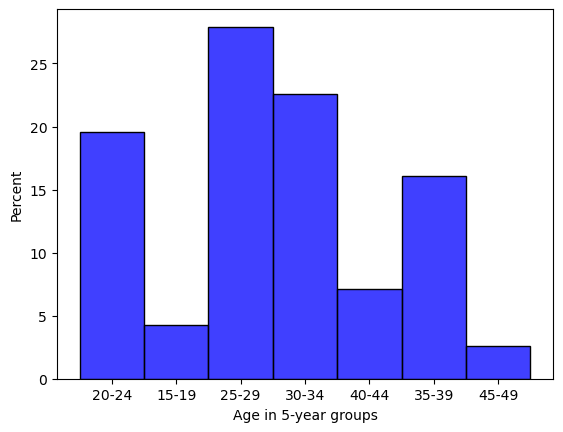

In [47]:
sns.histplot(anemia_df['Age in 5-year groups'], bins=10, kde=False, stat='percent', color='blue')

<Axes: xlabel='Type of place of residence', ylabel='Percent'>

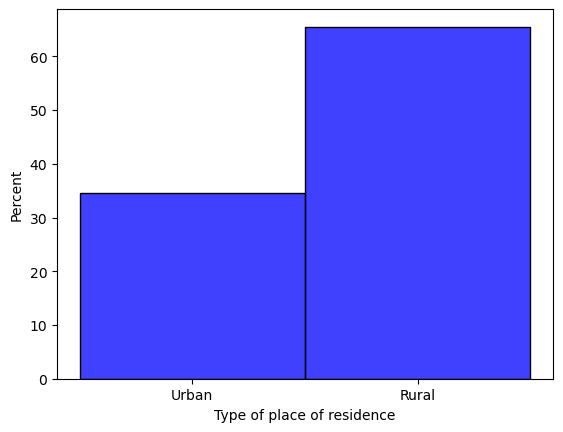

In [48]:
sns.histplot(anemia_df['Type of place of residence'], bins=10, kde=False, stat='percent', color='blue')

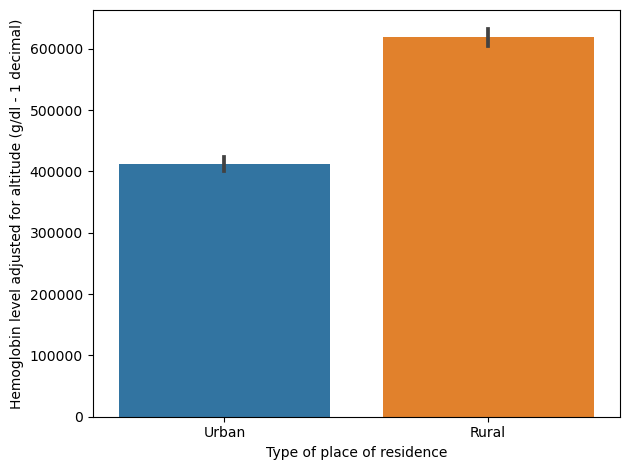

In [58]:
sns.barplot(data = anemia_df, y = 'Hemoglobin level adjusted for altitude (g/dl - 1 decimal)', x = 'Type of place of residence', estimator = sum)

plt.tight_layout()
plt.show()